In [10]:
import numpy as np
import matplotlib.pyplot as plt

## 1. 匯入MINIST手寫辨識數據集以及資料前處理
使用 tensorflow.keras.datasets 28x28 的手寫數字數據集

In [11]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train=X_train.reshape(len(X_train),-1)/255
X_test=X_test.reshape(len(X_test),-1)/255
# one hot encoding
y_train_one_hot = np.eye(10)[y_train]
y_test_one_hot = np.eye(10)[y_test]

print('Training data shape:',X_train.shape)
print('Testing data shape:',X_test.shape)

Training data shape: (60000, 784)
Testing data shape: (10000, 784)


In [12]:
y_train_one_hot[50]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [13]:
y_train[50]

3

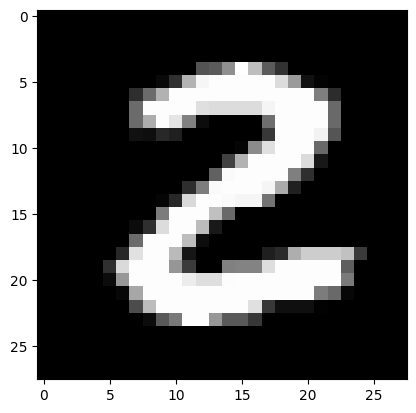

2


In [14]:
plt.imshow(X_train[25].reshape(28, 28), cmap='gray')
plt.show()
print(y_train[25])

## 2. 建立網路模型

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

print(tf.__version__)

2.12.0


In [16]:
# 此範例使用 Tensorflow2.0 Sequential API 搭建神經網路。
def build_model():
    model = Sequential()
    model.add(Dense(25, Activation('relu'), input_dim=X_train.shape[-1]))
    model.add(Dense(10, Activation('softmax')))
    return model

In [17]:
model = build_model()
model.summary()   # Weights = (784+1)*25+(25+1)*10

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 25)                19625     
                                                                 
 dense_3 (Dense)             (None, 10)                260       
                                                                 
Total params: 19,885
Trainable params: 19,885
Non-trainable params: 0
_________________________________________________________________


## 3. 編譯&訓練模型

In [18]:
# 編譯模型
optim = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=optim,
              metrics=['acc'])


# 訓練模型
history = model.fit(X_train, y_train_one_hot,
                    batch_size=64,
                    epochs=25,
                    verbose=1,
                    shuffle=True,
                    validation_split=0.1)


Epoch 1/25
844/844 [==============================] - 6s 6ms/step - loss: 0.4669 - acc: 0.8744 - val_loss: 0.2202 - val_acc: 0.9383
Epoch 2/25
844/844 [==============================] - 6s 7ms/step - loss: 0.2393 - acc: 0.9321 - val_loss: 0.1782 - val_acc: 0.9527
Epoch 3/25
844/844 [==============================] - 3s 3ms/step - loss: 0.1960 - acc: 0.9446 - val_loss: 0.1588 - val_acc: 0.9530
Epoch 4/25
844/844 [==============================] - 4s 5ms/step - loss: 0.1724 - acc: 0.9510 - val_loss: 0.1401 - val_acc: 0.9630
Epoch 5/25
844/844 [==============================] - 6s 7ms/step - loss: 0.1547 - acc: 0.9556 - val_loss: 0.1389 - val_acc: 0.9618
Epoch 6/25
844/844 [==============================] - 4s 5ms/step - loss: 0.1415 - acc: 0.9592 - val_loss: 0.1364 - val_acc: 0.9617
Epoch 7/25
844/844 [==============================] - 5s 6ms/step - loss: 0.1307 - acc: 0.9621 - val_loss: 0.1247 - val_acc: 0.9672
Epoch 8/25
844/844 [==============================] - 5s 6ms/step - loss: 0.

## 4) 觀察訓練結果

In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [20]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs_ = range(1,len(acc)+1)

### 訓練集和測試集 loss

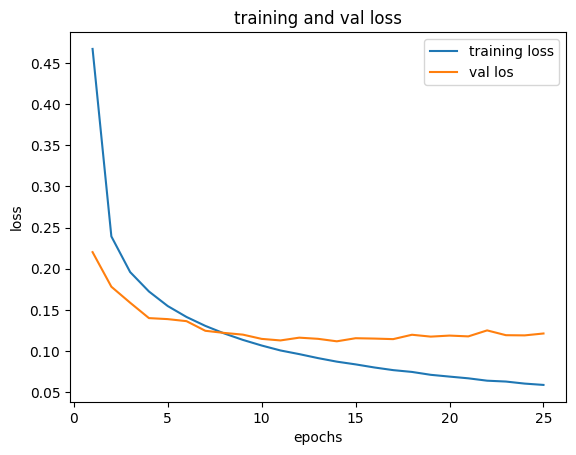

In [21]:
plt.plot(epochs_ , loss , label = 'training loss')
plt.plot(epochs_ , val_loss , label = 'val los')
plt.title('training and val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### 訓練集和測試集 accuracy

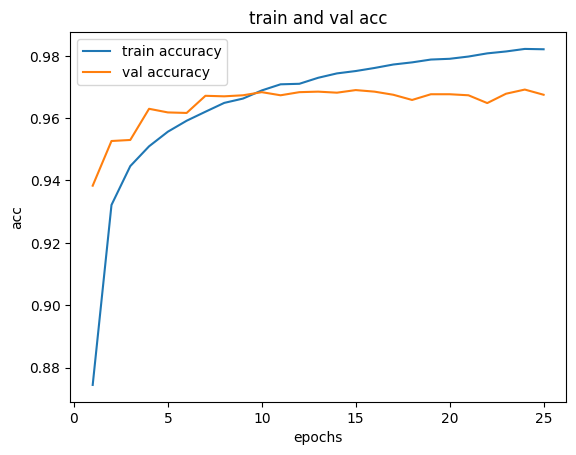

In [22]:
plt.clf()
plt.plot(epochs_ , acc , label='train accuracy')
plt.plot(epochs_ , val_acc , label = 'val accuracy')
plt.title('train and val acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

## 測試集預測

In [23]:
from sklearn.metrics import accuracy_score

pred =  np.argmax(model.predict(X_test), axis=1)
accuracy_score(y_test, pred)

313/313 [==============================] - 1s 2ms/step


0.964

## 統計training set預測預測正確與錯誤內容
10000 筆測試圖片中個找出前 8 張預測正確與錯誤的圖片。

In [24]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(X_test)):
    if(y_test[i]==pred[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(X_test)):
    if(y_test[i]!=pred[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

### training set 預測正確

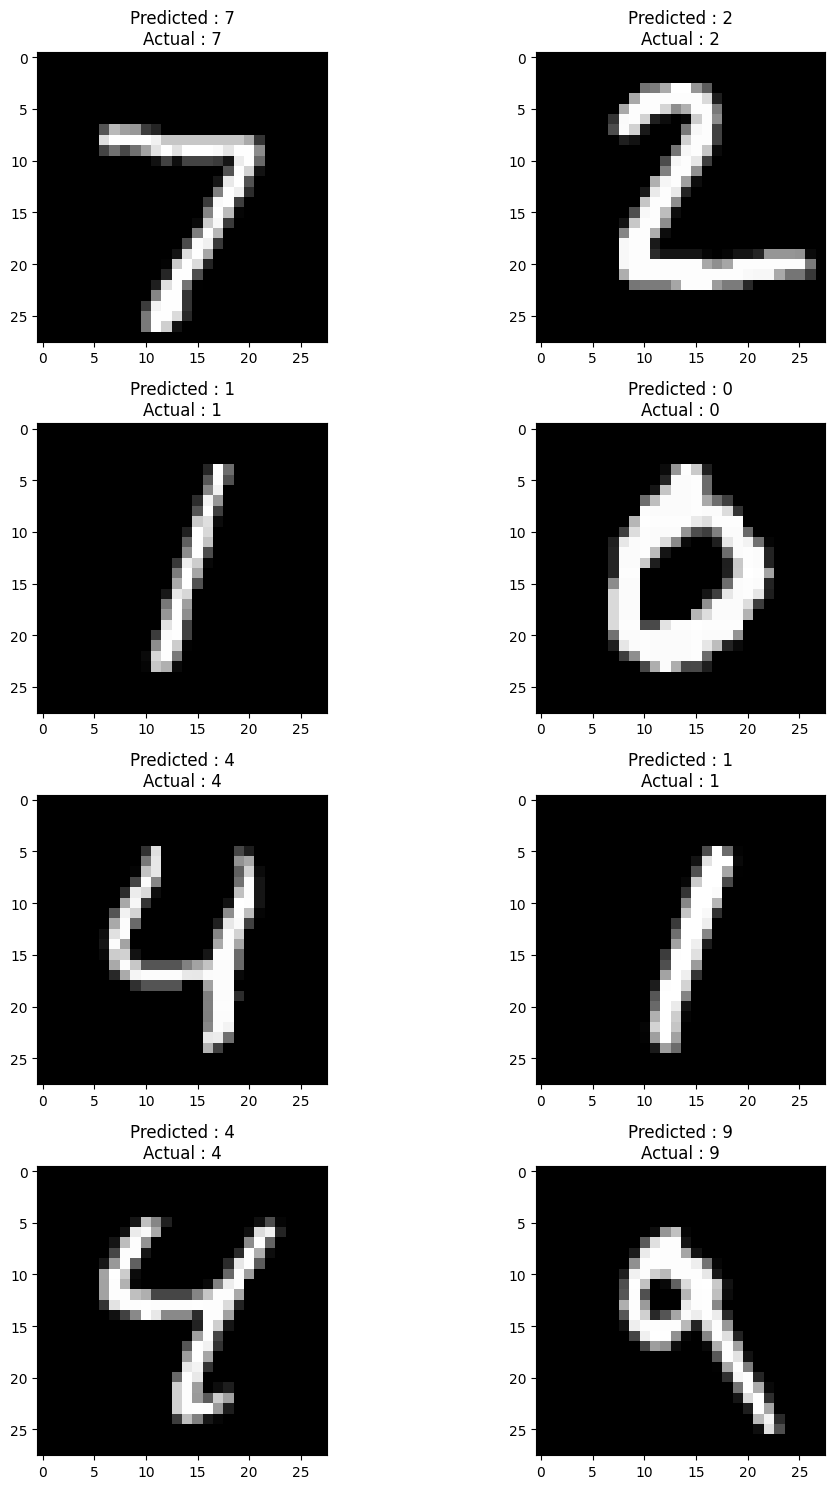

In [25]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(X_test[prop_class[count]].reshape(28, 28), cmap='gray')
        ax[i,j].set_title("Predicted : "+str(pred[prop_class[count]])+"\n"+"Actual : "+str(y_test[prop_class[count]]))
        plt.tight_layout()
        count+=1

### testing set 預測錯誤

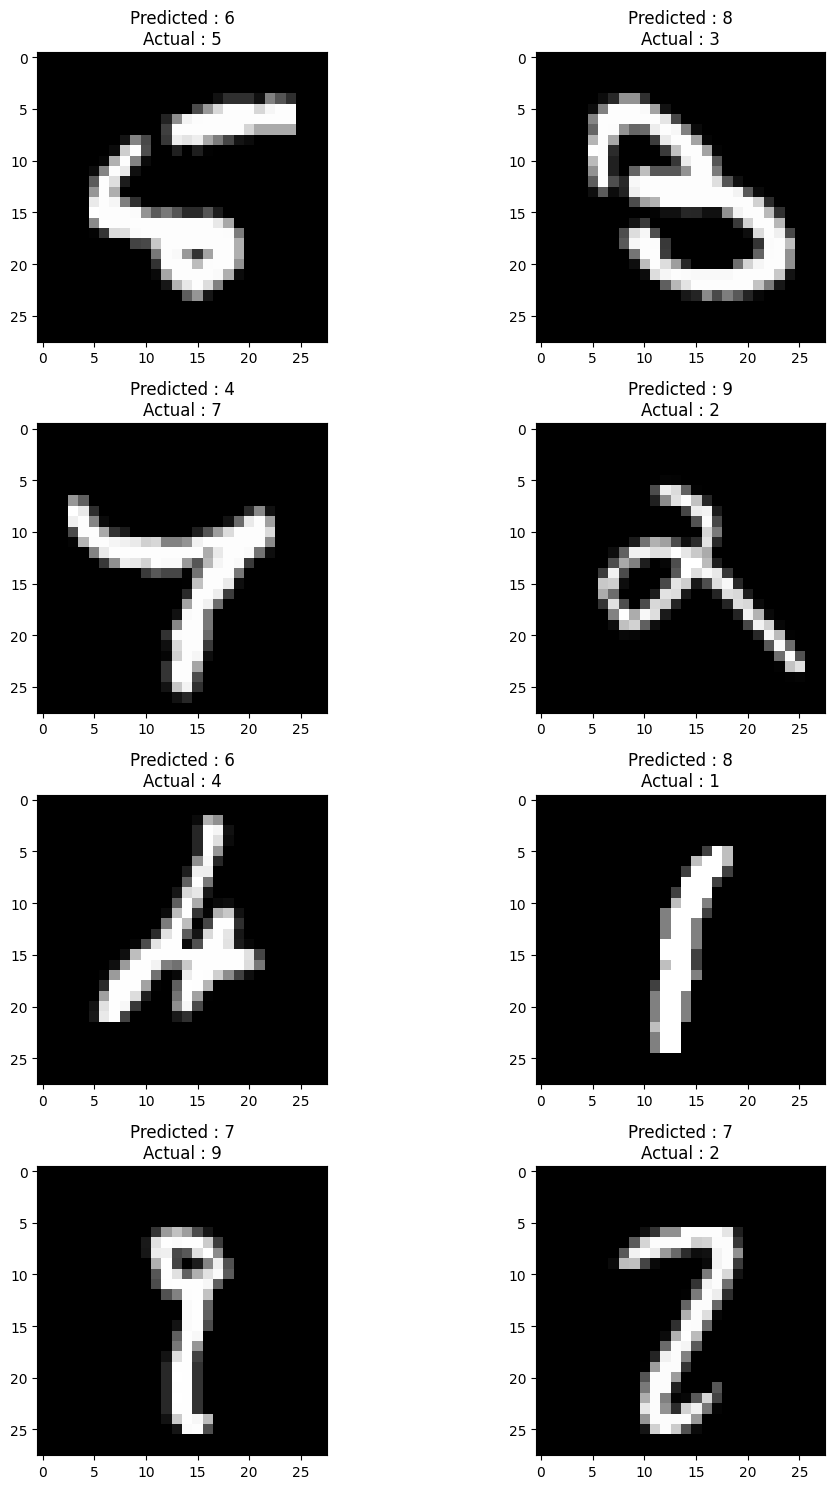

In [26]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(X_test[mis_class[count]].reshape(28, 28), cmap='gray')
        ax[i,j].set_title("Predicted : "+str(pred[mis_class[count]])+"\n"+"Actual : "+str(y_test[mis_class[count]]))
        plt.tight_layout()
        count+=1

儲存模型

In [27]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 33.1 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Succ

In [30]:
import tensorflowjs as tfjs

In [31]:
tfjs.converters.save_keras_model(model, 'modles')